<a href="https://colab.research.google.com/github/MathivaananAruldass/MathivaananAruldass.github.io/blob/main/License_Plate_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing Libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [48]:
#set path

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/My Drive/OneModo"


Mounted at /content/drive
anpr_ig_0.jpg  anpr_ig_mk.jpg  haarcascade_russian_plate_number.xml


In [49]:
#import dependencies
%matplotlib inline
import os
data= os.listdir('../content/drive/My Drive/OneModo')
data

['haarcascade_russian_plate_number.xml', 'anpr_ig_0.jpg', 'anpr_ig_mk.jpg']

In [9]:
lic_data = cv2.CascadeClassifier('../content/drive/My Drive/OneModo/haarcascade_russian_plate_number.xml')

In [10]:
def plt_show(image, title="", gray = False, size =(100,100)):
    temp = image
    if gray == False:
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        plt.title(title)
        plt.imshow(temp, cmap='gray')
        plt.show()

In [47]:
def detect_number(img):
    temp = img
    gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    number = lic_data.detectMultiScale(img,1.2)
    print("number plate detected:"+str(len(number)))
    for numbers in number:
        (x,y,w,h) = numbers
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+h]
        cv2.rectangle(temp, (x,y), (x+w,y+h), (0,255,0), 3)

    plt_show(temp)

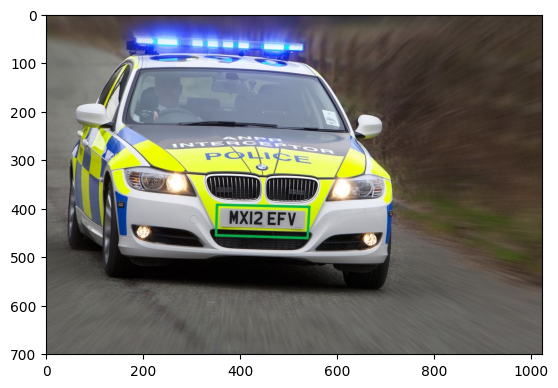

number plate detected:0


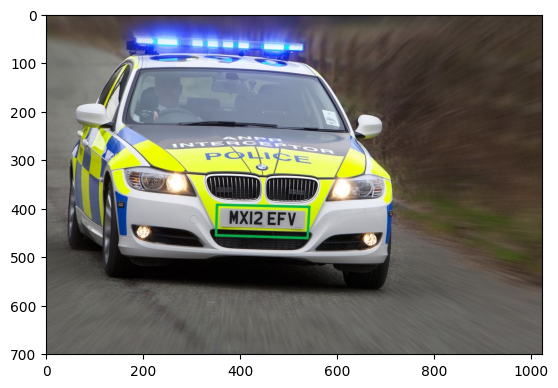

In [24]:
#Take input of car image with number plate
img = cv2.imread("../content/drive/MyDrive/OneModo/anpr_ig_mk.jpg")
plt_show(img)
detect_number(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x7863bcccb0d0>)

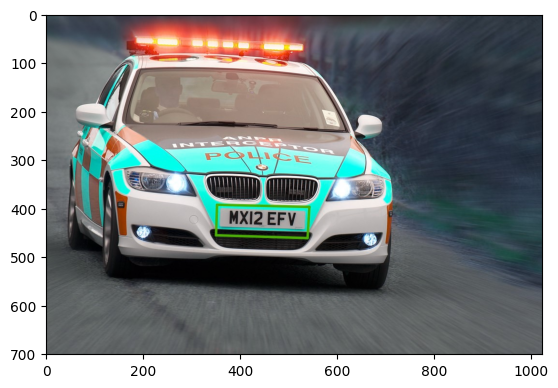

In [25]:
plt.subplot(1,1,1), plt.imshow(img)

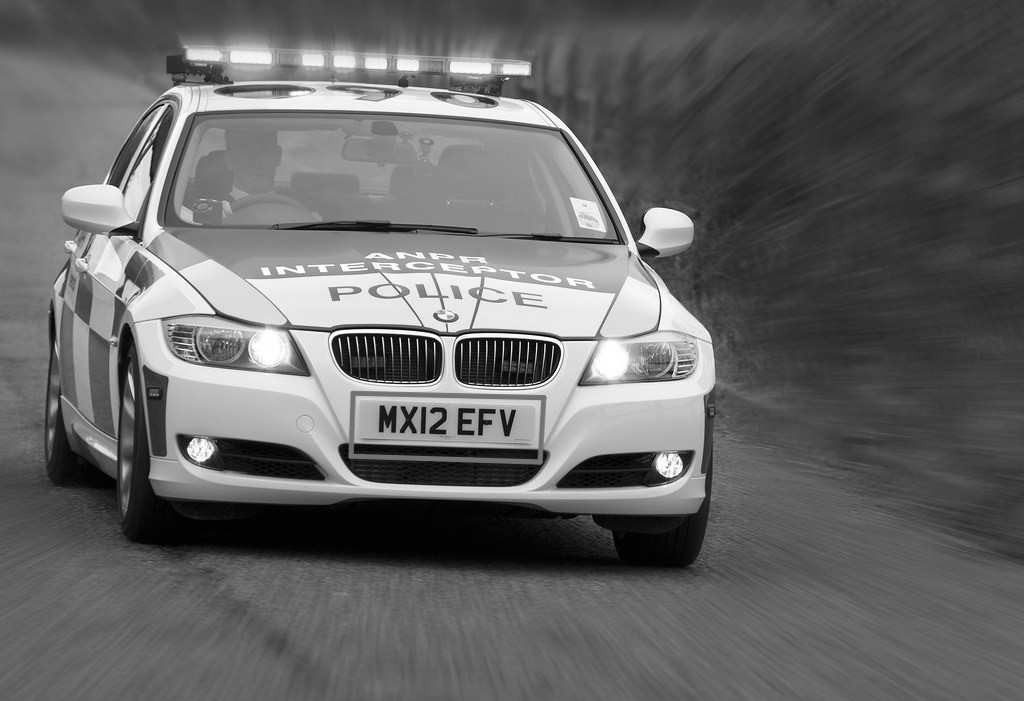

In [26]:
import cv2 as cv
from google.colab.patches import cv2_imshow
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

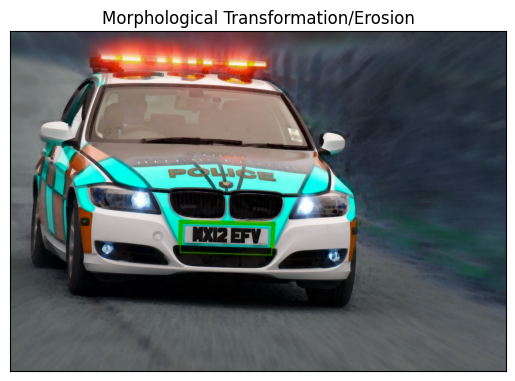

In [27]:
import numpy as np


kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.subplot(1,1,1), plt.imshow(erosion)
plt.title('Morphological Transformation/Erosion'), plt.xticks([]), plt.yticks([])
plt.show()

STEP 1: Edge Detection


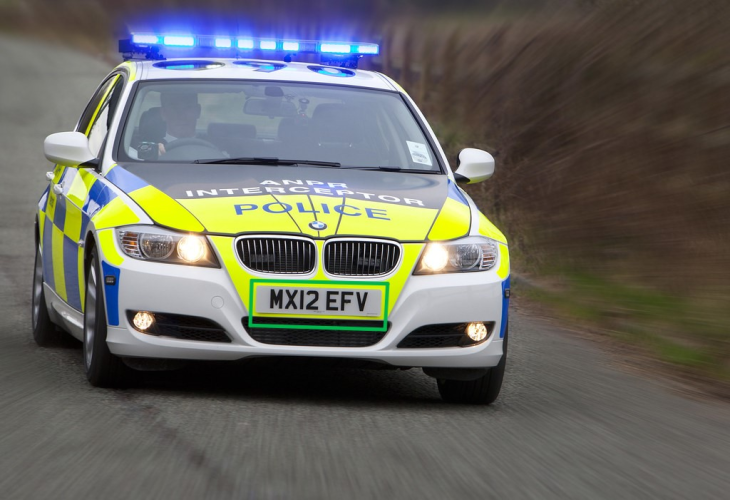

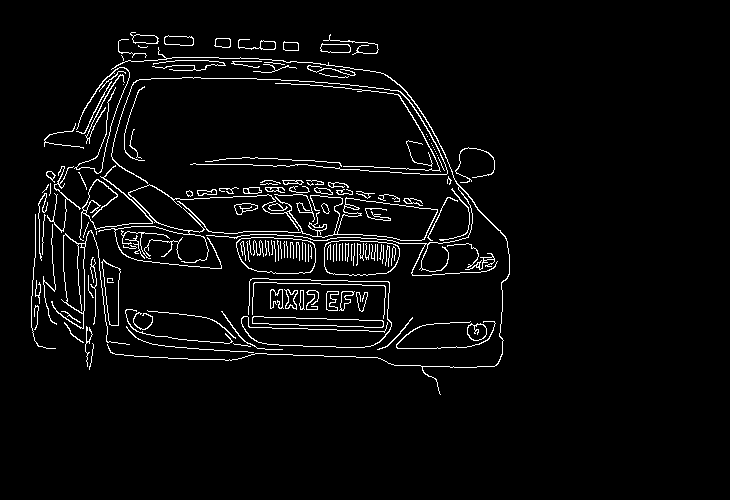

In [28]:
import imutils
image = img
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)

# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)

# show the original image and the edge detected image
print("STEP 1: Edge Detection")
cv2_imshow(image)
cv2_imshow(edged)

In [29]:
! pip install Pillow
! pip install pytesseract

In [30]:
img = cv2.resize(img, (620,480) )
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale

In [31]:
gray = cv2.bilateralFilter(gray, 13, 15, 15)

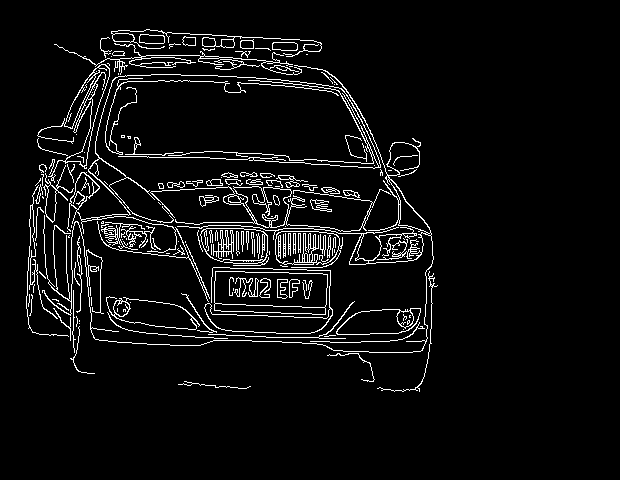

In [32]:
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection
cv2_imshow(edged)

In [33]:
contours=cv2.findContours(edged.copy(),cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
screenCnt = None

In [34]:
for c in contours:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

In [35]:
if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

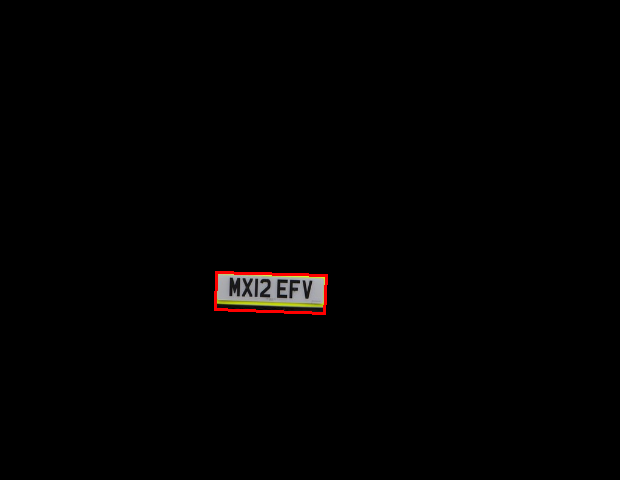

In [36]:
# Masking the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)
cv2_imshow(new_image)

In [37]:
# Now crop
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

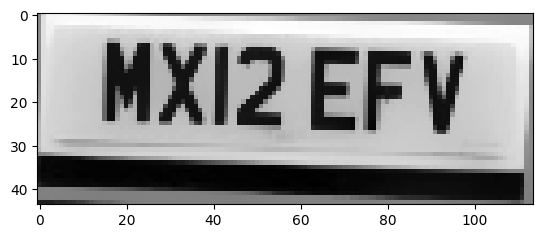

In [38]:
plt.imshow(Cropped, cmap = 'gray');

In [50]:
!pip install pytesseract
!pip install tesseract
!apt-get update
!apt-get install -y tesseract-ocr



Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [46]:
#Read the number plate
import pytesseract
text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("Detected license plate Number is:",text)

Detected license plate Number is: _Mxi2 EFV

